<a href="https://colab.research.google.com/github/arihant1224/video_game_sales_with_ratings_eda_project/blob/main/eda_video_games_sales_with_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Arihant Jain**<br>
### **Reg. No: 12018540**<br>
### **Roll No: RK20CHA09**<br>
### **Section: K20CH**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


# **Data Preparation and Cleaning**

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

videogame_df = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales_as_at_22_Dec_2016.csv']))
videogame_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
videogame_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
videogame_df.shape

(16719, 16)

In [5]:
videogame_df.sort_values(by = ['Name']).head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14985,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN
13795,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,Namco Bandai Games,0.20,0.12,0.45,0.07,0.84,71.0,59.0,7.9,216.0,Bandai Namco Games,T
4728,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,NaN,NaN,NaN,NaN,NaN,NaN
8343,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
7088,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN
8598,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
videogame_df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
videogame_df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
videogame_df[50:60]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,NaN,NaN,NaN,NaN,NaN,NaN
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
52,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,96.0,16.0,8.7,138.0,Polyphony Digital,E
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.82,0.81,2.11,10.70,84.0,82.0,7.5,1112.0,Polyphony Digital,E
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60,94.0,67.0,6.3,2073.0,Infinity Ward,M
56,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,NaN,NaN,NaN,NaN,NaN,NaN
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,NaN,NaN,NaN,NaN,NaN,NaN
59,Super Mario 64,DS,2004.0,Platform,Nintendo,5.01,3.07,1.25,0.97,10.30,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for col in videogame_df.columns:
    print(col)

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating


In [10]:
#finding all Names but only UNIQUE.
x = videogame_df['Name'].unique() 
y = videogame_df['Genre'].unique()
z = videogame_df['Publisher'].unique()

In [11]:
print('Total Games by `Name` count(unique) :',len(x))
print('Total Games by `Genre` count(unique) :',len(y))
print('Total Games by `Publisher` count(unique) :',len(z))

Total Games by `Name` count(unique) : 11563
Total Games by `Genre` count(unique) : 13
Total Games by `Publisher` count(unique) : 582


In [12]:
videogame_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [13]:
(videogame_df.isnull().sum()/videogame_df.shape[0])*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


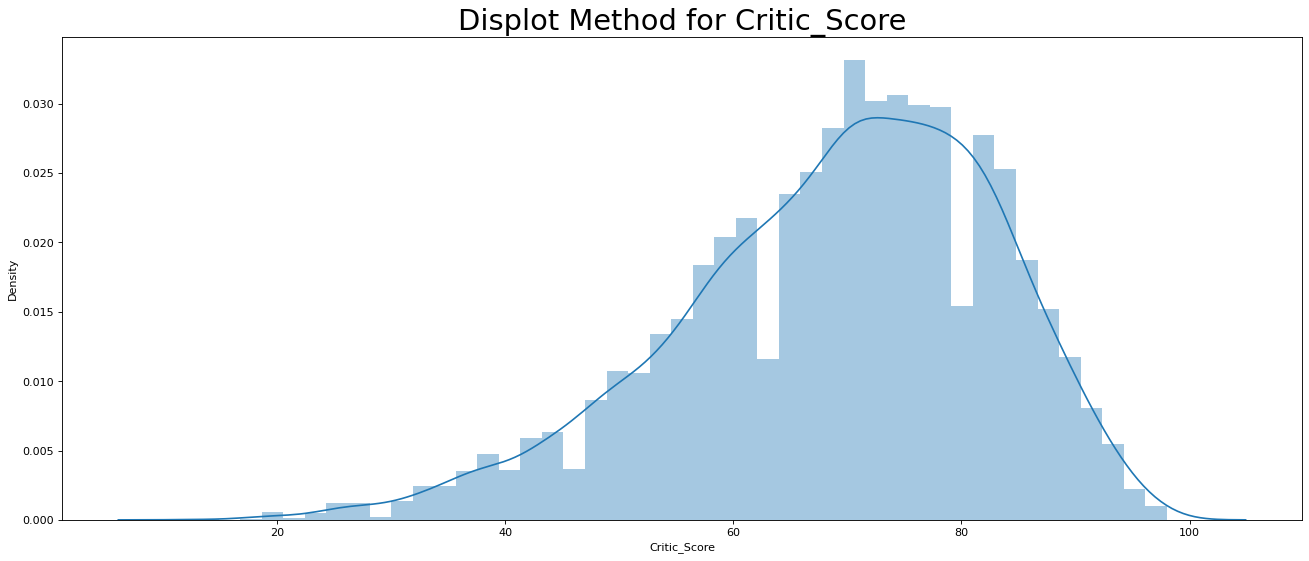

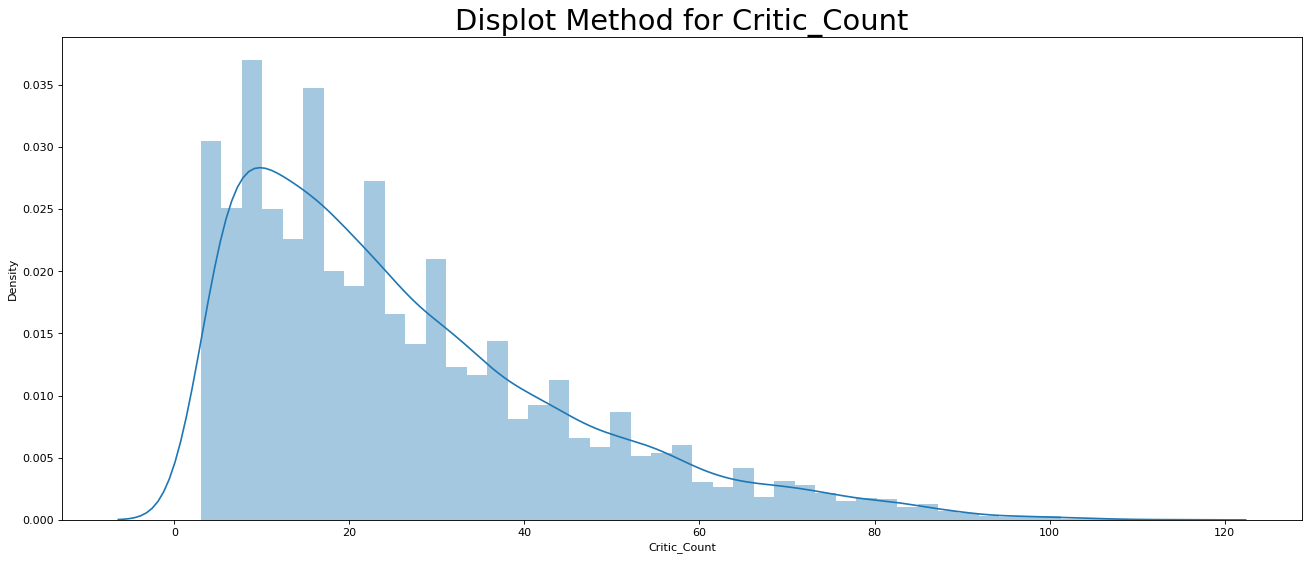

In [14]:
df_name = ['Critic_Score','Critic_Count']
j = 0
df_lst = [videogame_df.Critic_Score,
          videogame_df.Critic_Count]

for i in df_lst:
    plt.figure(figsize=(20,8), dpi= 80)
    sns.distplot(i)
    plt.title('Displot Method for '+str(df_name[j]), fontdict={'fontsize':26})
    j += 1

#these columns are skewed thats why I am imputting missing values via median

In [15]:
videogame_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [16]:
videogame_df['Critic_Score'].median()

71.0

In [17]:
videogame_df['Critic_Score'].fillna(videogame_df['Critic_Score'].median(), inplace = True)

In [18]:
videogame_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [19]:
videogame_df['Critic_Count'].median()

21.0

In [20]:
videogame_df['Critic_Count'].fillna(videogame_df['Critic_Count'].median(), inplace = True)

In [21]:
videogame_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [22]:
videogame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [23]:
videogame_df['User_Count'].median()

24.0

In [24]:
videogame_df['User_Count'].fillna(videogame_df['User_Count'].median(), inplace = True)

In [25]:
videogame_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [26]:
videogame_df = videogame_df.drop(videogame_df[videogame_df['Name'].isnull()].index)

In [27]:
videogame_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6702
User_Count            0
Developer          6621
Rating             6767
dtype: int64

In [28]:
videogame_df = videogame_df.drop(videogame_df[videogame_df['Publisher'].isnull()].index)

In [29]:
videogame_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     247
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6656
User_Count            0
Developer          6576
Rating             6720
dtype: int64

In [30]:
videogame_df = videogame_df.drop(videogame_df[videogame_df['Year_of_Release'].isnull()].index)

In [31]:
videogame_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6579
User_Count            0
Developer          6512
Rating             6649
dtype: int64

# **Univariate Analysis**

In [32]:
videogame_df.shape

(16416, 16)

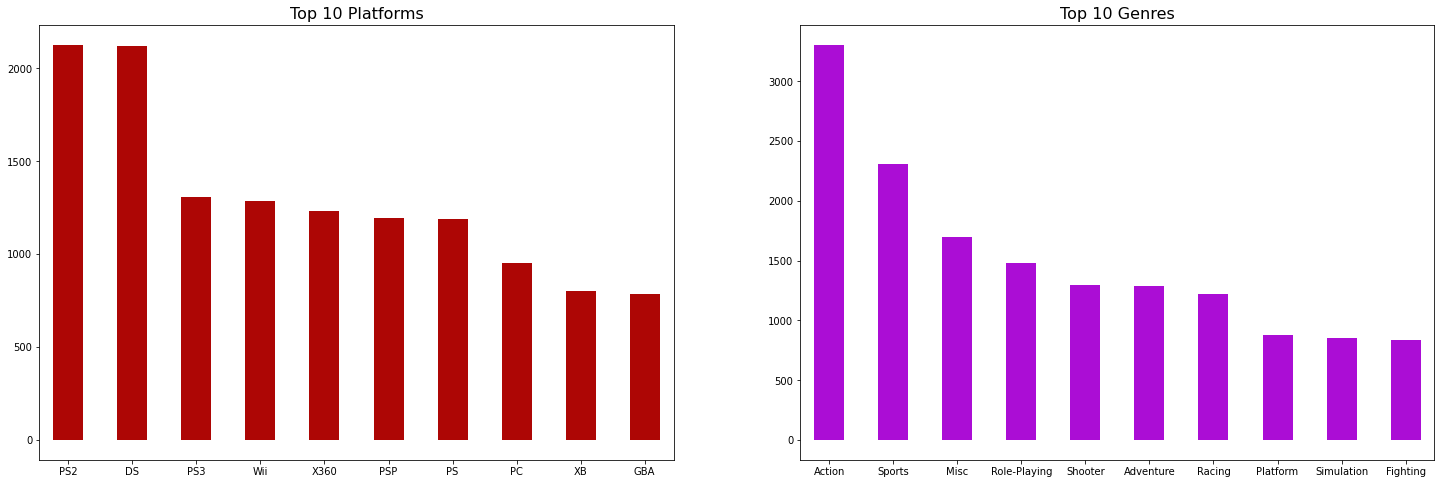

In [33]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = videogame_df.Platform.value_counts().head(10).index
topPlatforms_values = videogame_df.Platform.value_counts().head(10).values

#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = videogame_df.Genre.value_counts().head(10).index
topGenres_values = videogame_df.Genre.value_counts().head(10).values

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8), facecolor='white')

##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=16)

#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=16)
plt.show()

**Conclution for above Bar Graph are :**

* DS and PS2 are the most popular platforms in comparison to others platform.
* Action is the most popular genre and the second most is the sports

In [34]:
top15 = videogame_df[0:15]
top15

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,NaN,24.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,NaN,24.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,21.0,NaN,24.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,21.0,NaN,24.0,NaN,NaN


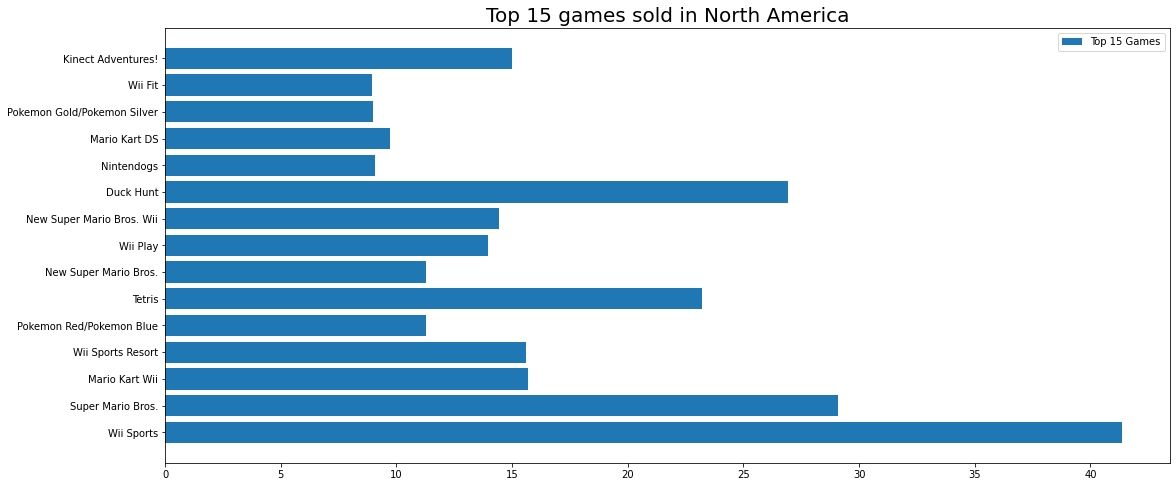

In [35]:
#top 15 games in NA (North America)
plt.figure(figsize = (18,8))
plt.barh(top15["Name"],top15["NA_Sales"], label = 'Top 15 Games')
plt.title("Top 15 games sold in North America",fontdict = {"fontsize":20})
plt.legend()
plt.show()

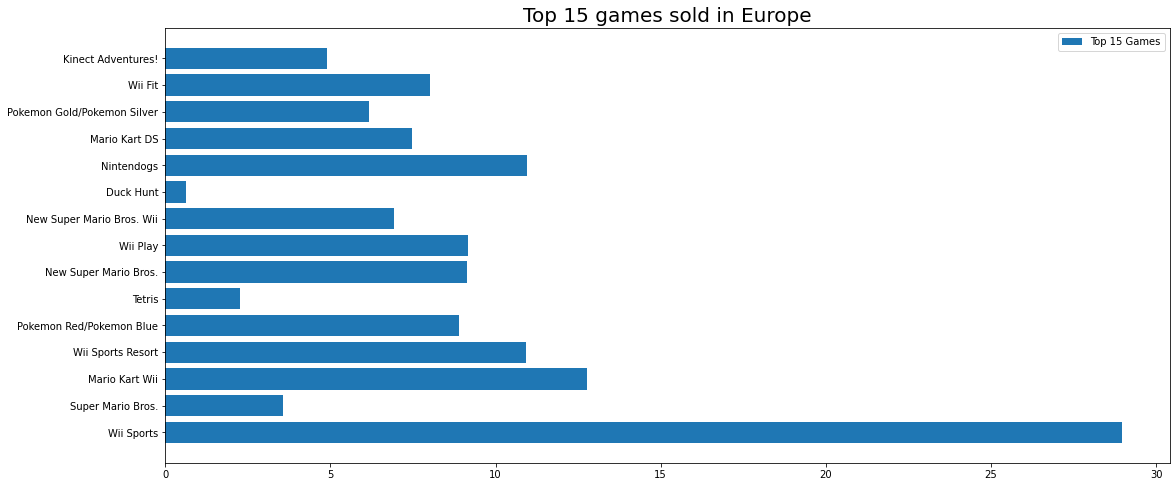

In [36]:
#top 15 games in EU (Europe)
plt.figure(figsize = (18,8))
plt.barh(top15["Name"],top15["EU_Sales"], label = 'Top 15 Games')
plt.title("Top 15 games sold in Europe",fontdict = {"fontsize":20})
plt.legend()
plt.show()

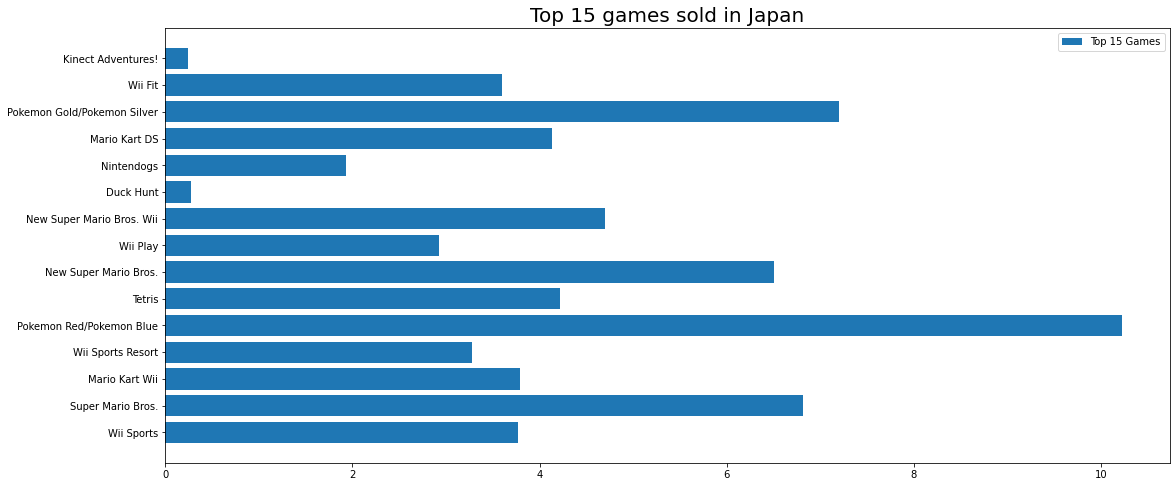

In [37]:
#top 15 games in JP (Japan)
plt.figure(figsize = (18,8))
plt.barh(top15["Name"],top15["JP_Sales"], label = 'Top 15 Games')
plt.title("Top 15 games sold in Japan",fontdict = {"fontsize":20})
plt.legend()
plt.show()

# **Bivariate Analysis**

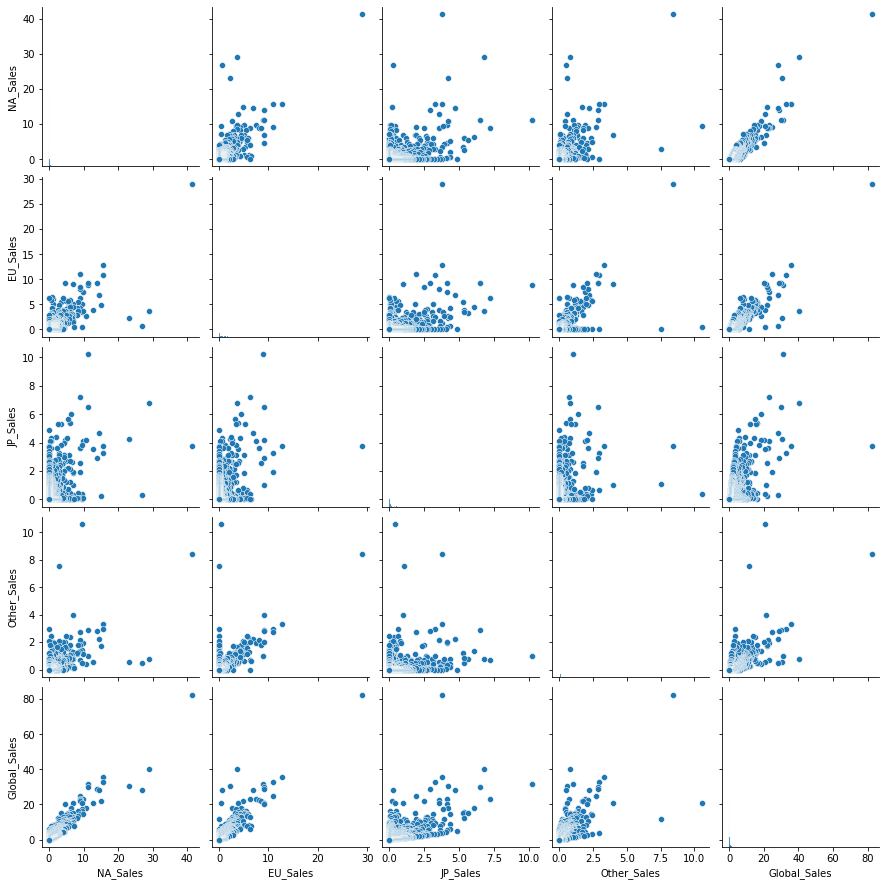

In [38]:
# Corellating among all Continents/Countries using Seaborn to perform pairplot and to plot the graph with matplotlib:
sns.pairplot(videogame_df.loc[0:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])
plt.show()

**Conclution Upon performing the correlation among various countries :**
* North America is the major market as the Global sales are highly correlated with it.
* Europe is also an important region.
* One intresting thing is Japanies sales are not correlated with any region's sales,We can assume that JAPANESE people have different taste, when it's about games.

In [39]:
# Video game sales based on genre (Global, North America, Europe, Japan)
df_genre = videogame_df.groupby('Genre')

def genreBased(region):
    xrange = np.arange(1,len(df_genre.sum())+1)
    fig,ax= plt.subplots(ncols=2,figsize=(18,6))
    df_to_plot = df_genre.sum().sort_values(by=region,ascending =False)[::-1]
    df_to_plot[region].plot(kind='barh')
    plt.title(region)
    
    #labels
    ax[1].set_ylabel(None)
    ax[1].tick_params(axis='both', which='major', labelsize=13)
    ax[1].set_xlabel('Total Sales(in millions)', fontsize=15,labelpad=21)
    
    #spines
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].grid(False)
    
    #annotations    
    for x,y in zip(np.arange(len(df_genre.sum())+1),df_genre.sum().sort_values(by=region,ascending =False)[::-1][region]):
        label = "{:}".format(y)
        labelr = round(y,2)
        plt.annotate(labelr, (y,x), textcoords="offset points", xytext=(6,0), ha='left',va="center")
     
    #donut chart
    theme = plt.get_cmap('Blues')
    ax[0].set_prop_cycle("color", [theme(1. * i / len(df_to_plot))for i in range(len(df_to_plot))])    
    wedges, texts,_ = ax[0].pie(df_to_plot[region], wedgeprops=dict(width=0.45), startangle=-45,labels=df_to_plot.index,
                      autopct="%.1f%%",textprops={'fontsize': 13,})

 
    plt.tight_layout()

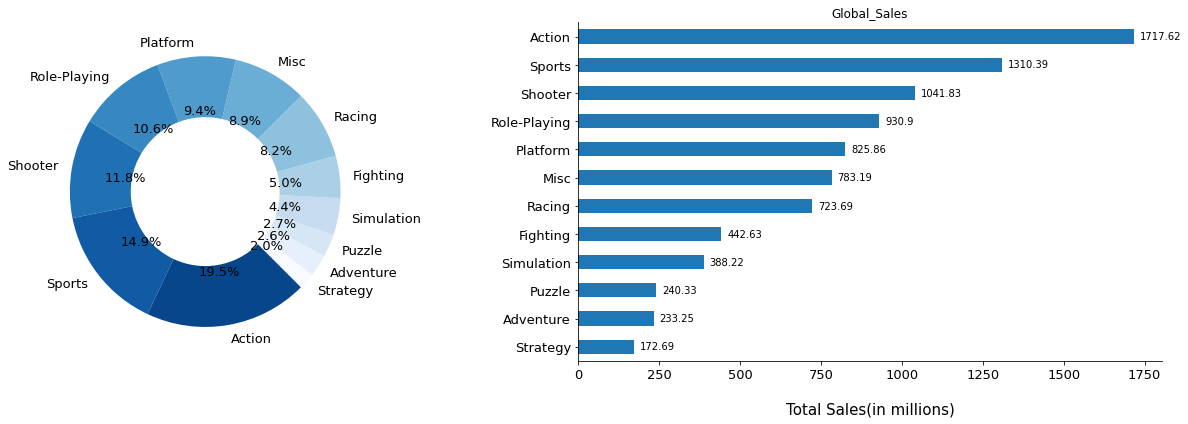

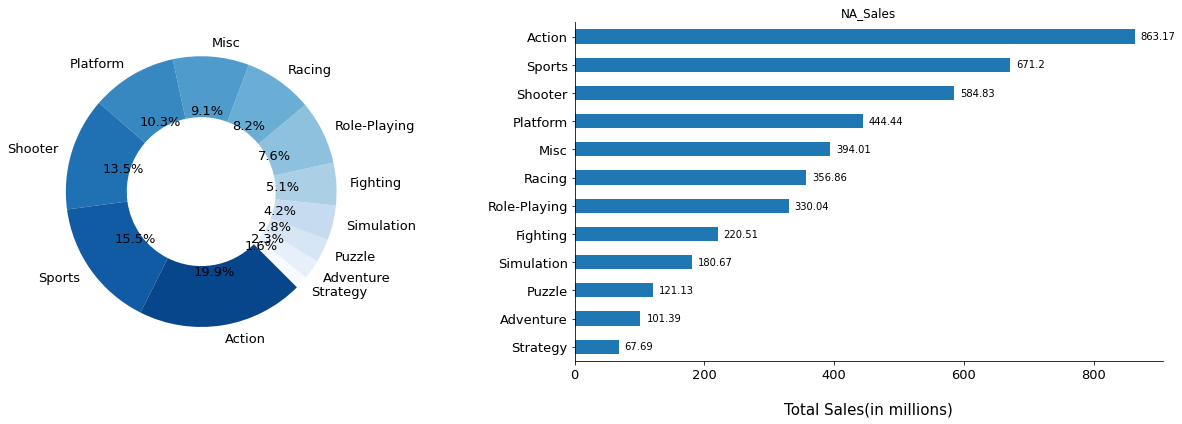

In [40]:
# Global vs North America
genreBased('Global_Sales') #ABOVE
genreBased('NA_Sales') #BELOW

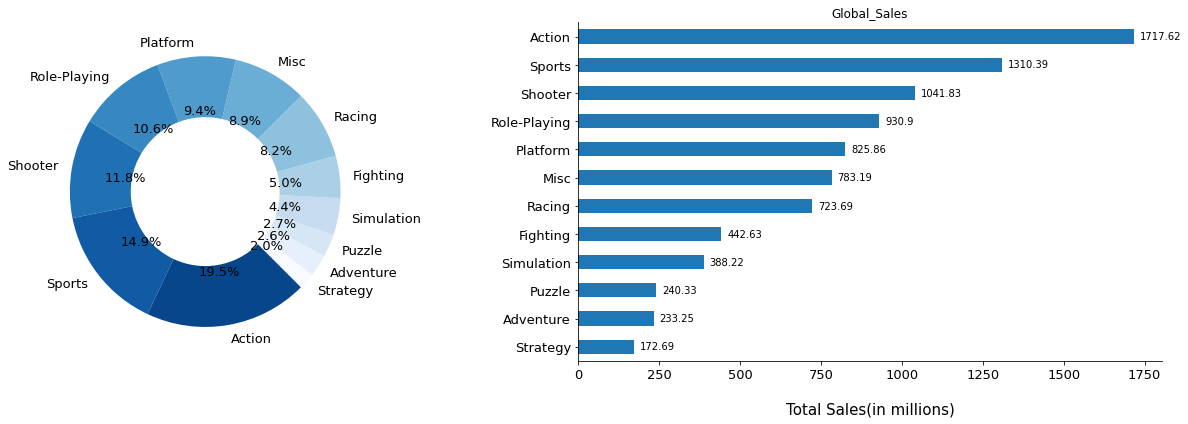

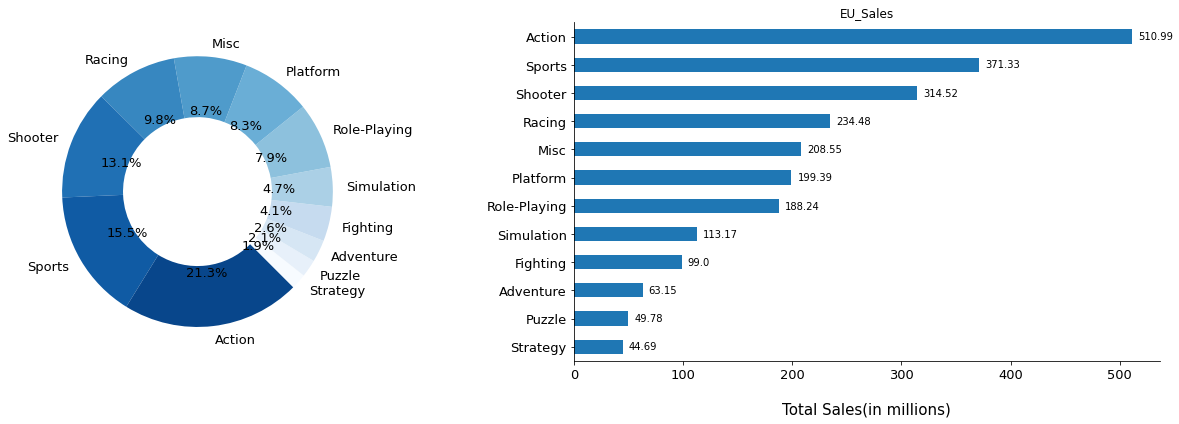

In [41]:
# Global vs Europe
genreBased('Global_Sales') #ABOVE
genreBased('EU_Sales') #BELOW

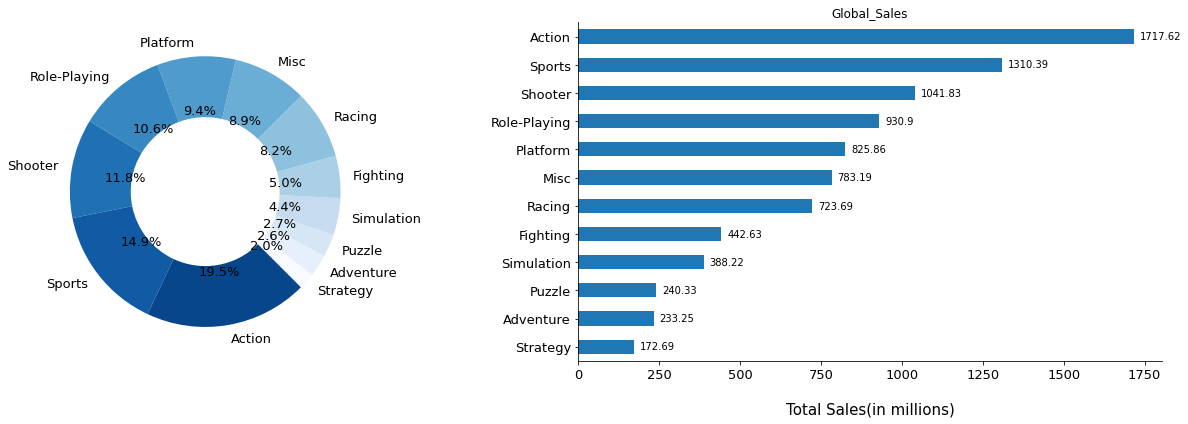

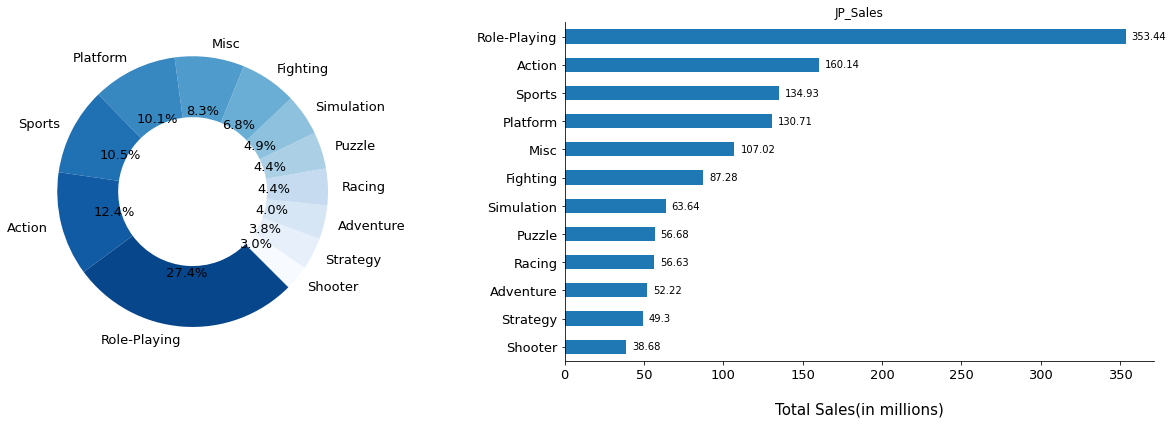

In [42]:
# Global vs Japan
genreBased('Global_Sales') #ABOVE
genreBased('JP_Sales') #BELOW

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot view of Global vs. North America Sales')

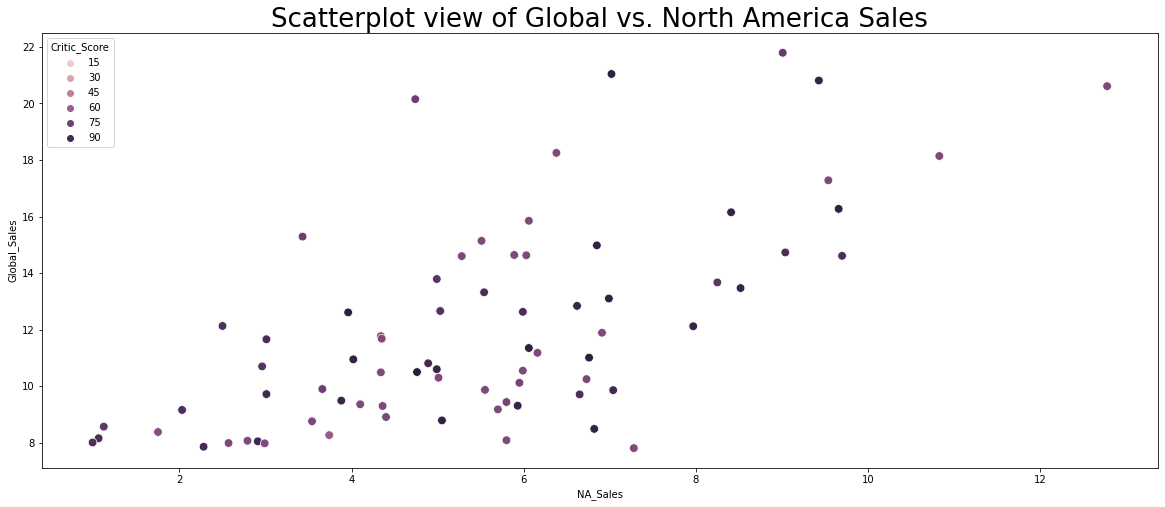

In [43]:
# Displaying the trend of Analysis using Seaborn's Scatterplot method

plt.figure(figsize=(20,8))
sns.scatterplot(videogame_df.NA_Sales[15:90], # X-axis taken in range from 15 to 90
                videogame_df.Global_Sales[15:90],  # Y-axis taken in range from 15 to 90
                hue=videogame_df.Critic_Score,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. North America Sales", fontdict={'fontsize':26})

# X-label and Y-label are in millions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot view of Global vs. Europe Sales')

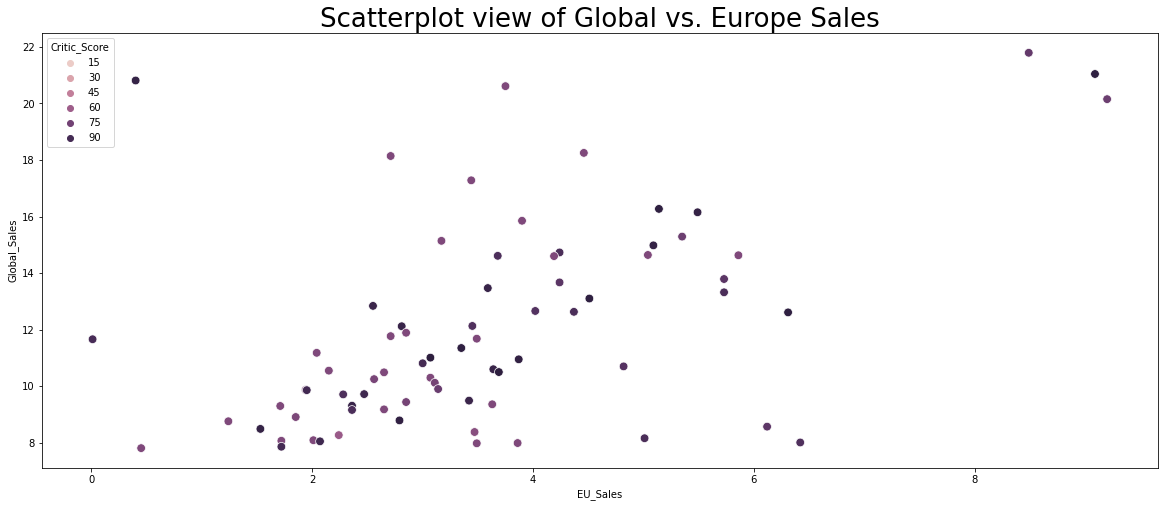

In [44]:
plt.figure(figsize=(20,8))
sns.scatterplot(videogame_df.EU_Sales[15:90], # X-axis taken in range from 15 to 90
                videogame_df.Global_Sales[15:90],  # Y-axis taken in range from 15 to 90
                hue=videogame_df.Critic_Score,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. Europe Sales", fontdict={'fontsize':26})

# X-label and Y-label are in millions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot view of Global vs. JP Sales')

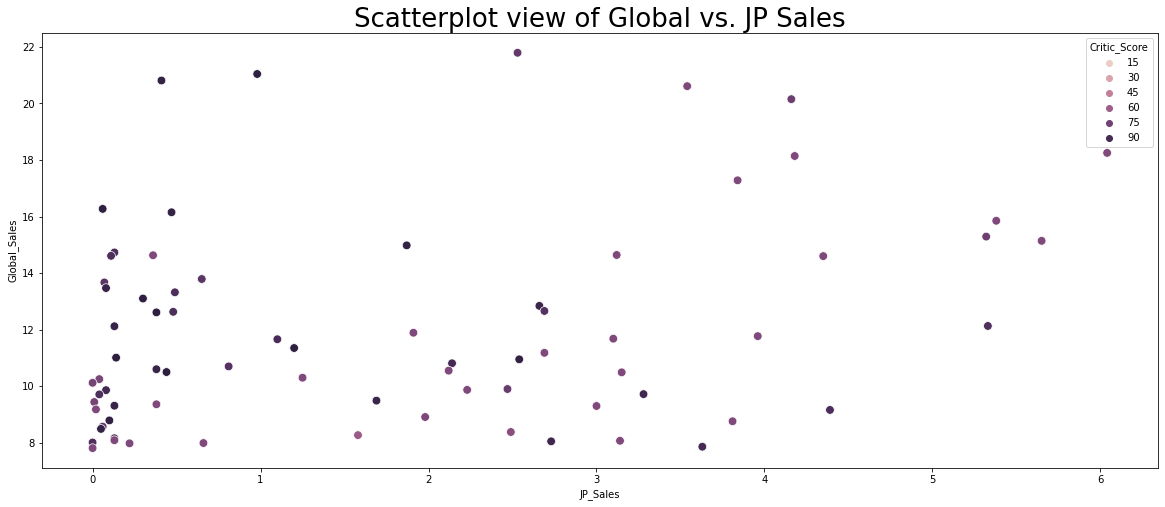

In [45]:
plt.figure(figsize=(20,8))
sns.scatterplot(videogame_df.JP_Sales[15:90], # X-axis taken in range from 15 to 90
                videogame_df.Global_Sales[15:90],  # Y-axis taken in range from 15 to 90
                hue=videogame_df.Critic_Score,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. JP Sales", fontdict={'fontsize':26})

# X-label and Y-label are in millions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot view of Global vs. Other Sales')

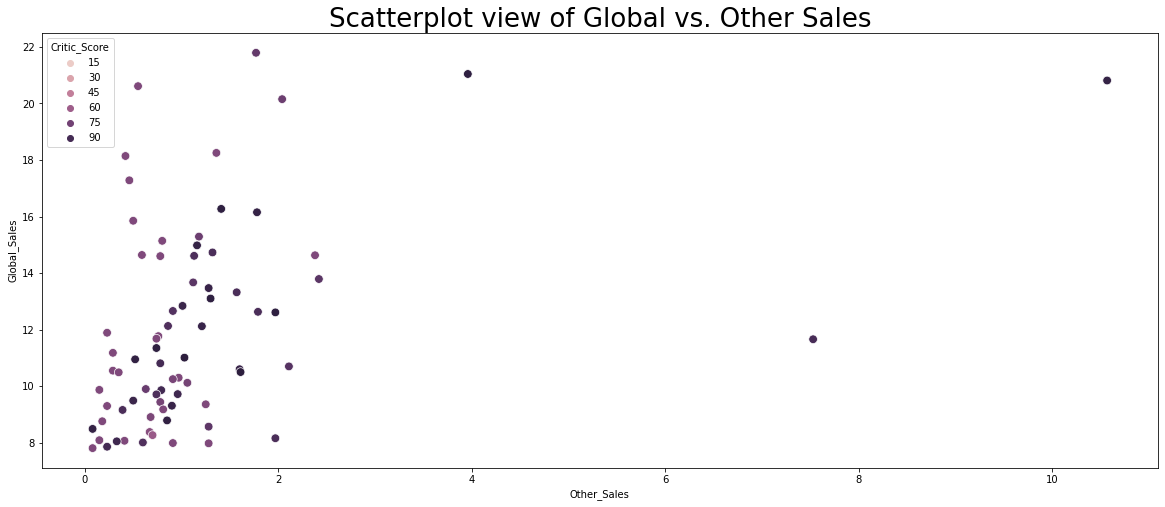

In [46]:
plt.figure(figsize=(20,8))
sns.scatterplot(videogame_df.Other_Sales[15:90], # X-axis taken in range from 15 to 90
                videogame_df.Global_Sales[15:90],  # Y-axis taken in range from 15 to 90
                hue=videogame_df.Critic_Score,  # Dot color
                s=75)
plt.title("Scatterplot view of Global vs. Other Sales", fontdict={'fontsize':26})

# X-label and Y-label are in millions

# **Multivariate Analysis**

In [58]:
vg_plot = videogame_df[0:25]
vg_plot

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,NaN,24.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,NaN,24.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,21.0,NaN,24.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,21.0,NaN,24.0,NaN,NaN


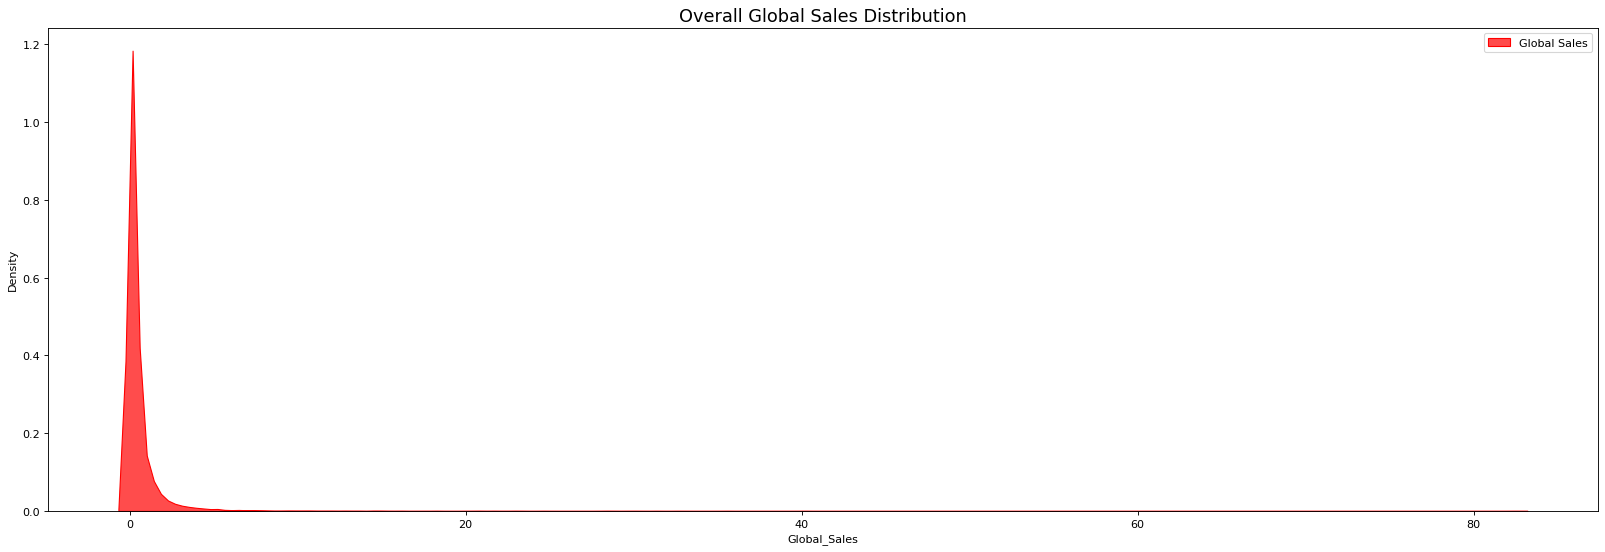

In [59]:
# Draw Plot
plt.figure(figsize=(25,8), dpi= 80)
sns.kdeplot(videogame_df.Global_Sales, shade=True, label = 'Global Sales', color="r", alpha=.7)

# Decoration
plt.title('Overall Global Sales Distribution', fontsize=16)
plt.legend()
plt.show()

In [60]:
total = vg_plot['Global_Sales']
NA = vg_plot['NA_Sales']
EUR = vg_plot['EU_Sales']
JAP = vg_plot['JP_Sales']

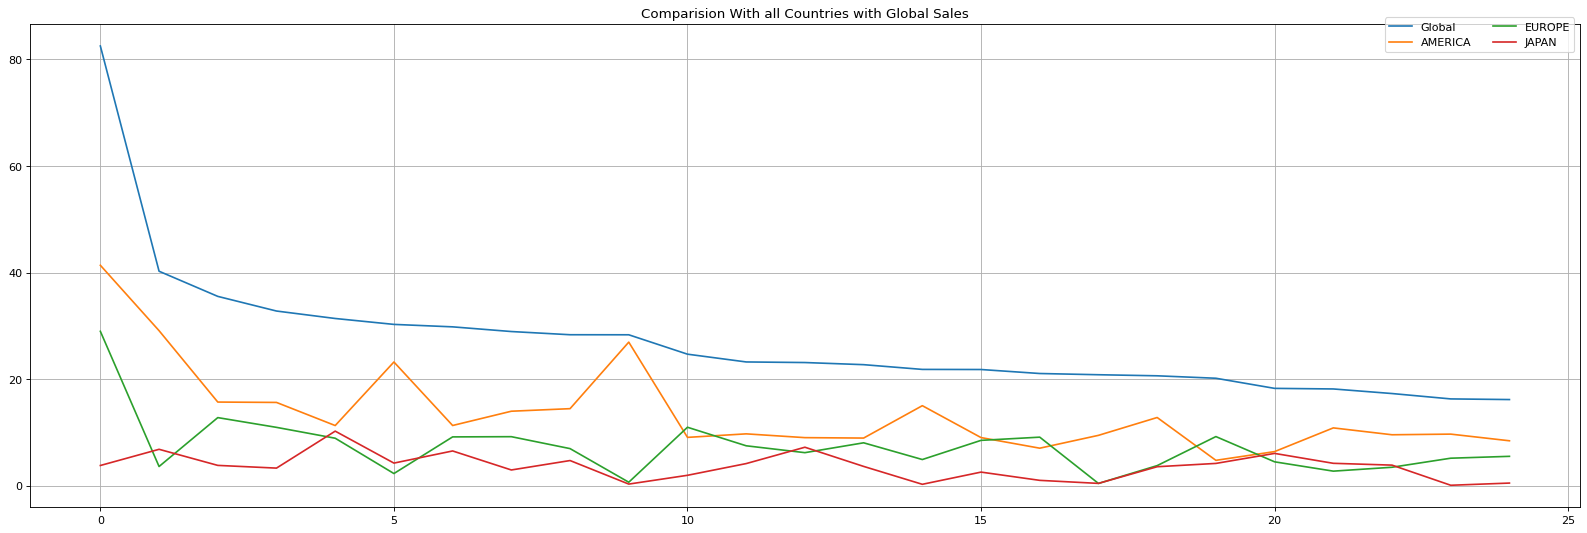

In [61]:
plt.figure(figsize=(25,8), dpi= 80)
plt.grid(True)
plt.title('Comparision With all Countries with Global Sales')

plt.plot(total, label = 'Global')
plt.plot(NA, label = 'AMERICA')
plt.plot(EUR, label = 'EUROPE')
plt.plot(JAP, label = 'JAPAN')
plt.legend(bbox_to_anchor =(1.0, 1.025), ncol = 2)